In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import pandas as pd

In [2]:
xrdsNorESMall_levs = xr.open_dataset("/share/sabl0586/all_stations_NorESM_OsloAero_prcp2szdst_f19_f19_noresmv211_corr_ilevall_levs_4Peter.nc")
SMRNorlevs =  xrdsNorESMall_levs.sel(station='SMR-II')
lev = SMRNorlevs.indexes['lev']
time = SMRNorlevs.indexes['time']

In [3]:
lev[31-0]

np.float64(992.556095123291)

In [4]:
dsECEearthallevs=xr.open_dataset("/share/sabl0586/all_stations_EC-Earth_PRCP2SZDST_ilevall_levs_4Peter.nc")
SMREClevs = dsECEearthallevs.sel(station = 'SMR-II')
EClev = SMREClevs.indexes['lev']
EClevifs = SMREClevs.indexes['lev_ifs']
ECtime = SMREClevs.indexes['time']


In [5]:
CloudBaseHeight = xr.DataArray(dims = ['time'], coords = dict( time = time)) 
CloudBaseTemp = xr.DataArray(dims = ['time'], coords = dict( time = time))

def FindCloudbaseNor(Data):
    for t in range (0, len(Data['FREQL'])):
        a = Data['FREQL'].isel(time = t)
        a = a.to_numpy()
        a = np.flip(a)
        result= []
        for i in range(0,len(a)):
            if a[i]>0.8: 
                result.append(i) 
                #break
        if len(result)>0:
            CloudBaseHeight[t] = lev[31-result[0]]
            CloudBaseTemp[t] = Data['T'].sel(lev=lev[31-result[0]]).isel(time =t)
        else:
            CloudBaseHeight[t] = np.nan
            CloudBaseTemp[t] = np.nan
    return CloudBaseHeight, CloudBaseTemp

In [6]:
ECCloudBaseHeight = xr.DataArray(dims = ['time'], coords = dict( time = ECtime)) 
ECCloudBaseTemp = xr.DataArray(dims = ['time'], coords = dict( time = ECtime))

def FindCloudbaseEC(Data):
    for t in range (0, len(Data['var248'].sel(lev = 1))):
        a = Data['var248'].sel(lev = 1).isel(time = t)
        a = a.to_numpy()
        a = np.flip(a)
        result= []
        
        for i in range(0,len(a)):
            if a[i]>0.5: 
                result.append(i) 
            
        if len(result)>0:
            ECCloudBaseHeight[t] = SMREClevs['var54'].sel(lev_ifs = EClevifs[90-result[0]], lev= 1).isel(time =t)
            ECCloudBaseTemp[t] = SMREClevs['var130'].sel(lev_ifs=EClevifs[90-result[0]], lev = 1).isel(time =t)
        else:
            ECCloudBaseHeight[t] = np.nan
            ECCloudBaseTemp[t] = np.nan
    return ECCloudBaseHeight, ECCloudBaseTemp

In [7]:
NorCloudBase = FindCloudbaseNor(SMRNorlevs)

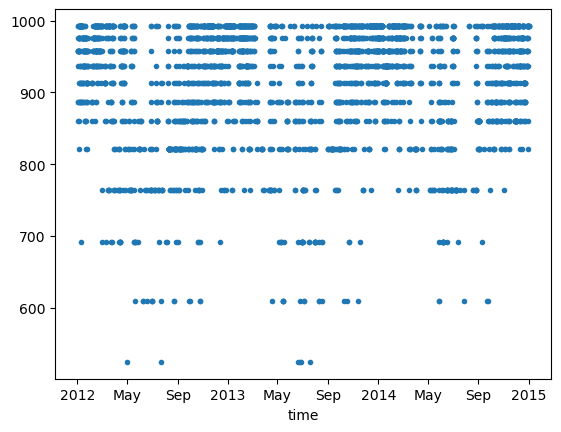

In [8]:
NorCloudBase[0].plot(linewidth=0, marker='.')

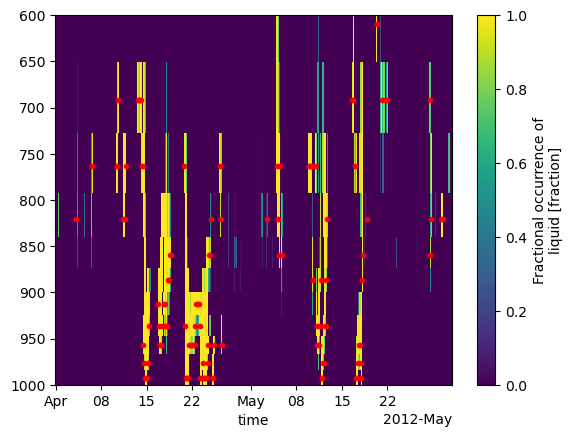

In [9]:
SMRNorlevs['FREQL'].sel(time=slice('2012-04','2012-05')).plot(x='time',ylim=[1000,600])
NorCloudBase[0].sel(time=slice('2012-04','2012-05')).plot(linewidth=0, marker='.', c='r', )


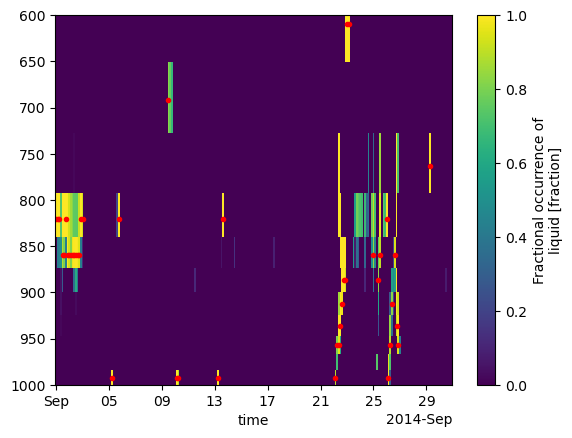

In [10]:
SMRNorlevs['FREQL'].sel(time=slice('2014-09','2014-09')).plot(x='time',ylim=[1000,600])
NorCloudBase[0].sel(time=slice('2014-09','2014-09')).plot(linewidth=0, marker='.', c='r', )


In [11]:
len(SMRNorlevs['FREQL'])

8761

In [12]:
ECCloudBase = FindCloudbaseEC(SMREClevs)


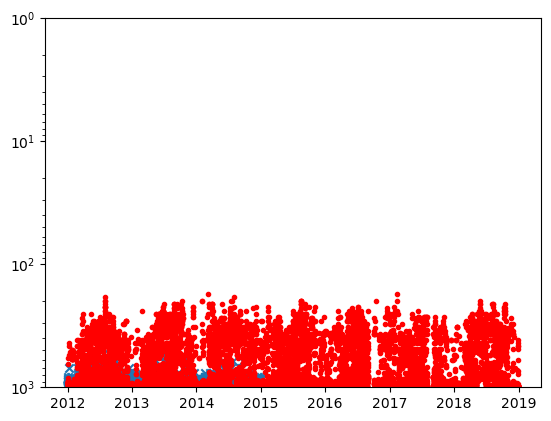

In [13]:
plt.scatter(time, NorCloudBase[0] , marker = 'x')
plt.scatter(ECtime, ECCloudBase[0]/100, color = 'r', marker = '.')
plt.ylim([1000,1])
plt.yscale('log')




(array([ 213.,  769.,  838.,  762.,  565.,  435.,  567., 1321., 2773.,
        5646.]),
 array([ 174.33607422,  260.29981055,  346.26354688,  432.2272832 ,
         518.19101953,  604.15475586,  690.11849219,  776.08222852,
         862.04596484,  948.00970117, 1033.9734375 ]),
 <BarContainer object of 10 artists>)

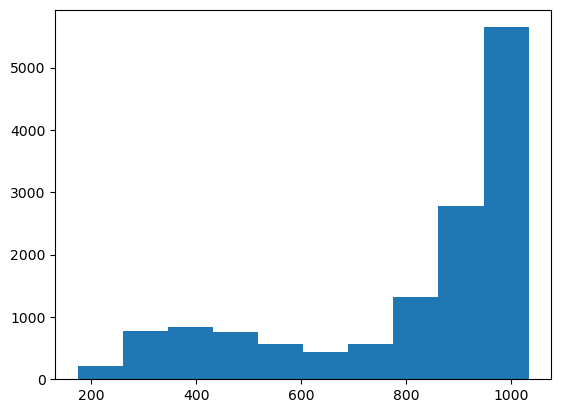

In [14]:

plt.hist(ECCloudBase[0]/100)

In [52]:
len(NorCloudBase[0].dropna('time'))

3864

(1000.0, 700.0)

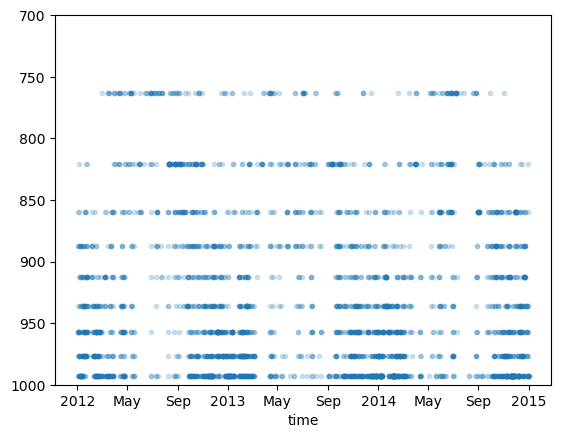

In [16]:
NorCloudBase[0].plot(linewidth=0, marker='.', alpha=.2)
plt.ylim([1000,700])

(array([  6.,   0.,   0.,   0.,   0.,  33.,   0.,   0.,   0.,   0.,  63.,
          0.,   0.,   0.,   0., 157.,   0.,   0., 263.,   0.,   0., 254.,
          0., 243., 264.,   0., 345., 449., 491., 952.]),
 array([524.68717471, 540.28280539, 555.87843607, 571.47406675,
        587.06969743, 602.66532811, 618.26095879, 633.85658947,
        649.45222015, 665.04785083, 680.64348151, 696.23911219,
        711.83474287, 727.43037355, 743.02600423, 758.62163492,
        774.2172656 , 789.81289628, 805.40852696, 821.00415764,
        836.59978832, 852.195419  , 867.79104968, 883.38668036,
        898.98231104, 914.57794172, 930.1735724 , 945.76920308,
        961.36483376, 976.96046444, 992.55609512]),
 <BarContainer object of 30 artists>)

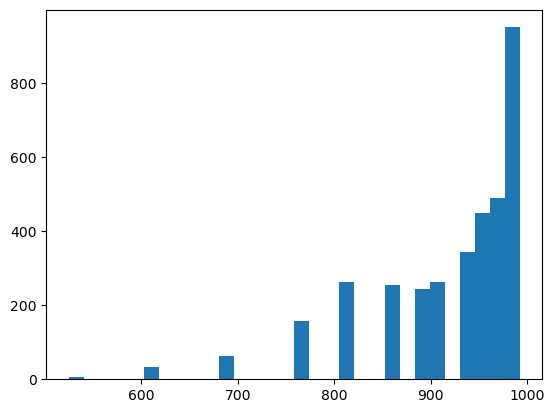

In [17]:
plt.hist(NorCloudBase[0],bins=30)


(array([  42.,  188.,  316.,  476.,  680., 1027.,  378.,  247.,  148.,
          18.]),
 array([251.8818512 , 255.79622955, 259.71060791, 263.62498627,
        267.53936462, 271.45374298, 275.36812134, 279.28249969,
        283.19687805, 287.11125641, 291.02563477]),
 <BarContainer object of 10 artists>)

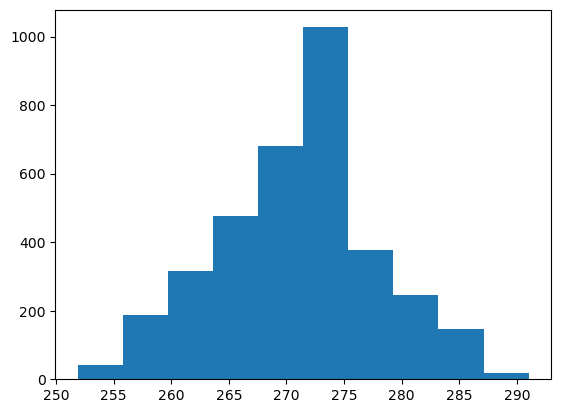

In [18]:
plt.hist(NorCloudBase[1])

(array([  20.,  139.,  402.,  782.,  929., 1002., 1981., 4839., 3225.,
         570.]),
 array([198.71864319, 208.03734894, 217.35605469, 226.67476044,
        235.99346619, 245.31217194, 254.63087769, 263.94958344,
        273.26828918, 282.58699493, 291.90570068]),
 <BarContainer object of 10 artists>)

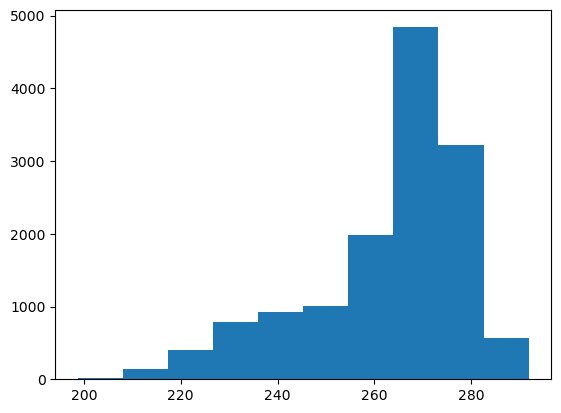

In [19]:
plt.hist(ECCloudBase[1])

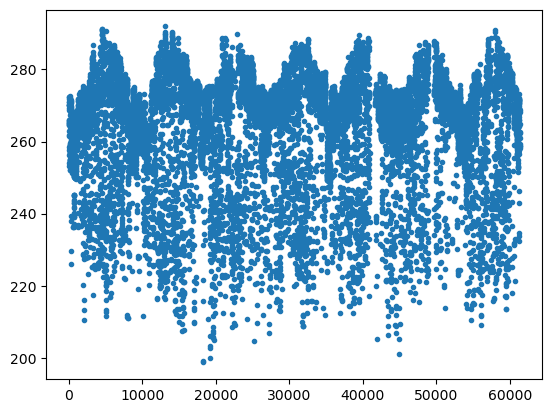

In [20]:
plt.plot(ECCloudBaseTemp, marker='.')

In [21]:

for t in range (0, len(SMRNorlevs['FREQL'])):
    a = SMRNorlevs['FREQL'].isel(time = t)
    a = a.to_numpy()
    a = np.flip(a)
    result= []
    for i in range(0,len(a)):
        if a[i]>0.5: 
            result.append(i) 
    if len(result)>0:
        CloudBaseHeight[t] = lev[31-result[0]]
        CloudBaseTemp[t] = SMRNorlevs['T'].sel(lev=lev[31-result[0]]).isel(time =t)
    else:
        CloudBaseHeight[t] = 'nan'
        CloudBaseTemp[t] = 'nan'


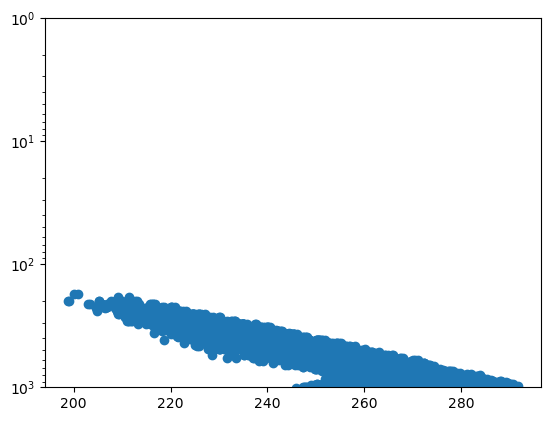

In [22]:
plt.scatter(ECCloudBase[1], ECCloudBase[0]/100)
plt.ylim([1000,1])
plt.yscale('log')

(1000, 1)

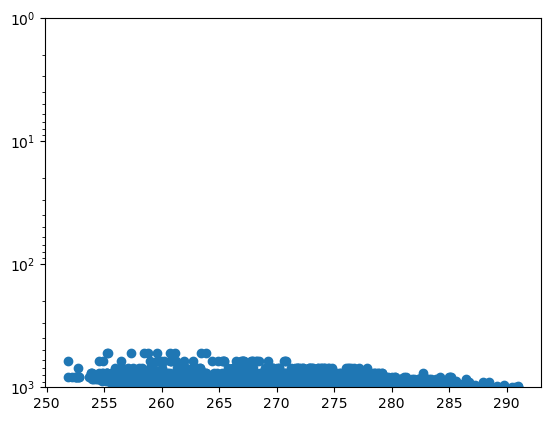

In [23]:
plt.scatter(CloudBaseTemp, CloudBaseHeight)
plt.yscale('log')
plt.ylim([1000,1])

In [24]:
a = SMREClevs['var248'].isel(time=3).sel(lev = 1)
a = np.flip(a)
result= []
for i in range(0,len(a)):
    if a[i]>0.5: 
            result.append(i) 
    if len(result)>0:
        TestBaseHeight = SMREClevs['var54'].sel(lev_ifs = EClevifs[90-result[0]], lev= 1)
        TestBaseTemp = SMREClevs['var130'].sel(lev_ifs=EClevifs[90-result[0]], lev = 1).isel(time =3)
    else:
        TestBaseHeight = 'nan'
        TestBaseTemp = 'nan'
print(TestBaseTemp)

<xarray.DataArray 'var130' ()> Size: 4B
[1 values with dtype=float32]
Coordinates:
    lev        float64 8B 1.0
    station    <U8 32B 'SMR-II'
    time       datetime64[ns] 8B 2012-01-01T03:00:00
    time_orig  datetime64[ns] 8B ...
    lev_ifs    float64 8B 91.0
Attributes:
    table:             128
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  128


In [25]:
SMREClevs['var130'].sel(lev_ifs=EClevifs[90-7], lev = 1).isel(time =300).to_numpy()

array(263.14432, dtype=float32)

In [26]:
np.nanmin(ECCloudBase[0])
for i in range(0, len(ECCloudBase[0])):
    if ECCloudBase[0][i] == np.nanmin(ECCloudBaseHeight):
        print(i)


19170


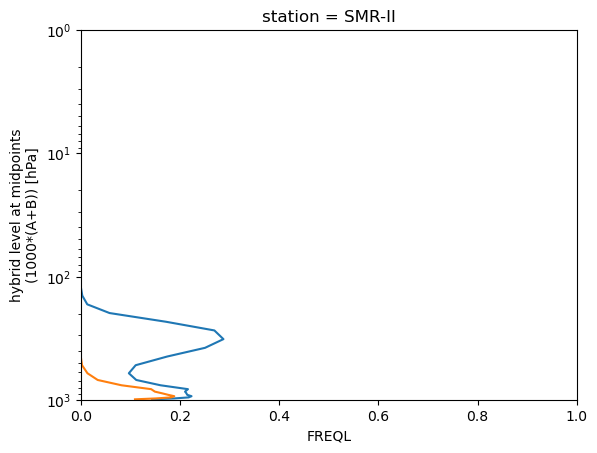

In [27]:

SMRNorlevs['CLOUD'].mean('time').plot(y='lev', ylim=[1000,1], xlim = [0,1], yscale = 'log')
SMRNorlevs['FREQL'].mean('time').plot(y='lev', ylim=[1000,1], xlim = [0,1], yscale = 'log')
SMRNorlevs['DropletNumber'] = SMRNorlevs['AWNC']/SMRNorlevs['FREQL']




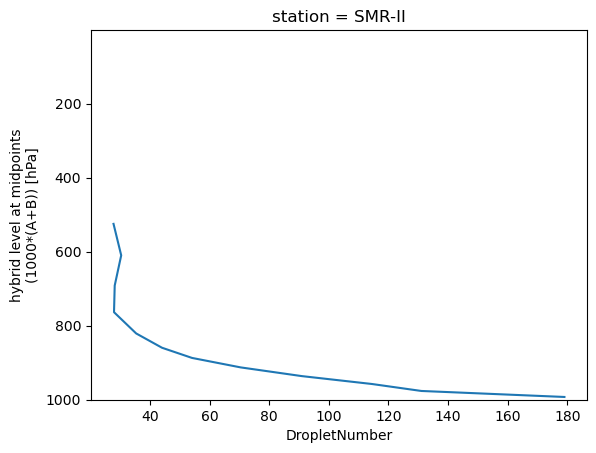

In [28]:
SMRNorlevs['DropletNumber'].mean('time').plot(y='lev', ylim=[1000,1])

(array([  2.,   3.,   8.,  30.,  60., 108., 100.,  93.,  73.,  71.,  59.,
         50.,  46.,  38.,  45.,  33.,  30.,  27.,  22.,  16.,  18.,  16.,
         13.,   7.,   3.,   3.,   2.,   3.,   0.,   1.]),
 array([  3.11263609,  19.94727898,  36.78192139,  53.6165657 ,
         70.45120239,  87.2858429 , 104.12049103, 120.95513153,
        137.78977966, 154.62442017, 171.45906067, 188.29370117,
        205.12835693, 221.96299744, 238.79763794, 255.63227844,
        272.46691895, 289.30157471, 306.13619995, 322.97085571,
        339.80548096, 356.64013672, 373.47476196, 390.30941772,
        407.14407349, 423.97869873, 440.81335449, 457.64797974,
        474.4826355 , 491.31726074, 508.1519165 ]),
 <BarContainer object of 30 artists>)

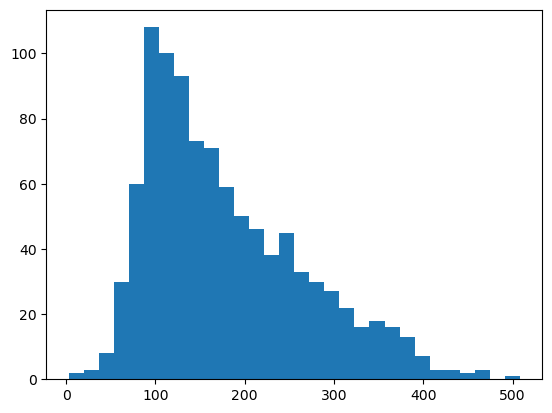

In [29]:
plt.hist(SMRNorlevs['DropletNumber'].isel(lev = -1), bins = 30)

In [30]:
np.std(np.log(SMRNorlevs['DropletNumber'].isel(lev = -1)))

<xarray.DataArray 'DropletNumber' ()> Size: 4B
np.float32(0.51473963)
Coordinates:
    station  <U8 32B 'SMR-II'
    lev      float64 8B 992.6

In [31]:
np.nanpercentile(SMRNorlevs['DropletNumber'].isel(lev = -1), 75 )

np.float32(236.61111)

In [32]:
stdplus = xr.DataArray(dims = ['lev'], coords = dict( lev = lev))
stdminus = xr.DataArray(dims = ['lev'], coords = dict( lev = lev))
percent25 = xr.DataArray(dims = ['lev'], coords = dict( lev = lev))
percent75 = xr.DataArray(dims = ['lev'], coords = dict( lev = lev))
for z in range(0,len(lev)):
    if SMRNorlevs['DropletNumber'].isel(lev = z).mean('time') > 0 :
        stdplus[z] = SMRNorlevs['DropletNumber'].isel(lev = z).mean('time') + np.nanstd(SMRNorlevs['DropletNumber'].isel(lev = z))
        stdminus[z] = SMRNorlevs['DropletNumber'].isel(lev = z).mean('time') - np.nanstd(SMRNorlevs['DropletNumber'].isel(lev = z))
        percent75[z] = np.nanpercentile(SMRNorlevs['DropletNumber'].isel(lev = z), 75 )
        percent25[z] = np.nanpercentile(SMRNorlevs['DropletNumber'].isel(lev = z), 25 )
    else:
        stdplus[z] = np.nan
        stdminus[z] = np.nan

(1000.0, 1.0)

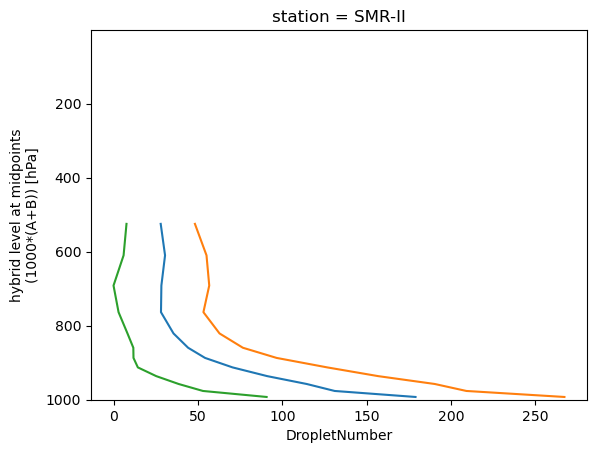

In [33]:

#plt.plot(percent25, lev)
#plt.plot(percent75, lev)
SMRNorlevs['DropletNumber'].mean('time').plot(y='lev', ylim=[1000,1])
plt.plot(stdplus,lev)
plt.plot(stdminus,lev)

plt.ylim([1000,1])



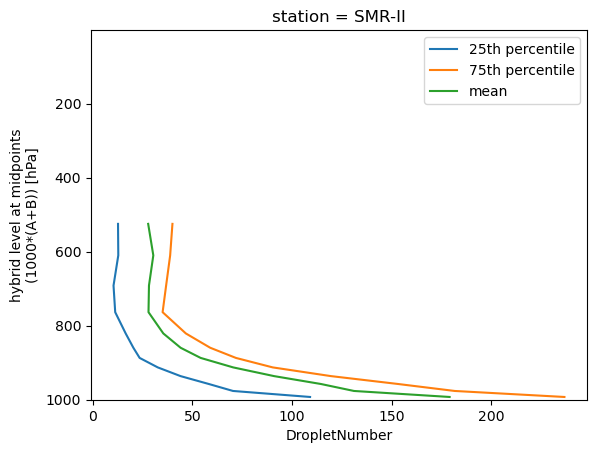

In [34]:
plt.plot(percent25, lev, label = '25th percentile')
plt.plot(percent75, lev, label = '75th percentile')
SMRNorlevs['DropletNumber'].mean('time').plot(y='lev', ylim=[1000,1], label = 'mean')
plt.legend()

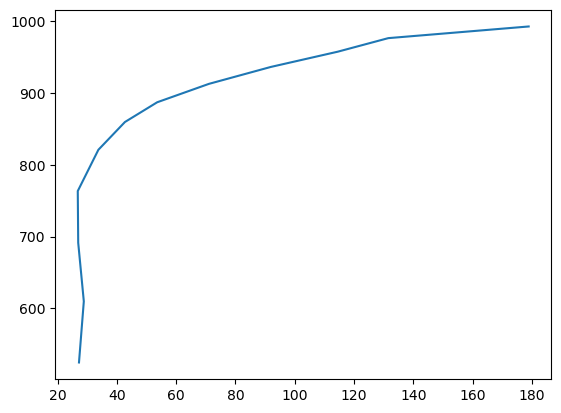

In [35]:
plt.plot(SMRNorlevs['AWNC'].mean('time')/SMRNorlevs['FREQL'].mean('time'), lev)

In [36]:
x = []

for i in range(0,len(SMRNorlevs['FREQL'].isel(lev= -1))):
    if SMRNorlevs['FREQL'].isel(lev= -1, time = i) > 0:
        x.append( SMRNorlevs['FREQL'].isel(lev= -1, time = i))

    else:
        continue 

In [37]:
np.percentile(x,25)

np.float32(0.9999986)

In [38]:
np.percentile(x,75)

np.float32(1.0)

In [39]:
np.mean(x)

np.float32(0.97667646)

(1000, 1)

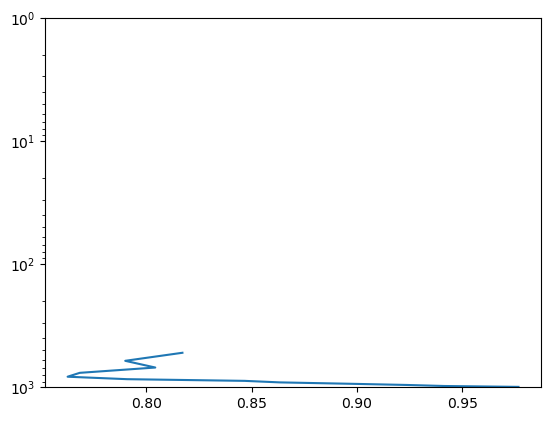

In [40]:
plt.plot(SMRNorlevs['FREQL'].where(SMRNorlevs['FREQL']>0).mean('time'),lev)
plt.yscale('log')
plt.ylim([1000,1])

In [41]:
SMREClevs

<xarray.Dataset> Size: 7GB
Dimensions:       (time: 61369, lev: 34, lev_ifs: 91)
Coordinates:
  * lev           (lev) float64 272B 1.0 2.0 3.0 4.0 5.0 ... 31.0 32.0 33.0 34.0
    station       <U8 32B 'SMR-II'
  * time          (time) datetime64[ns] 491kB 2012-01-01 ... 2019-01-01
    time_orig     (time) datetime64[ns] 491kB ...
  * lev_ifs       (lev_ifs) float64 728B 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
Data variables: (12/80)
    CCN0.20       (time, lev) float32 8MB ...
    CCN1.00       (time, lev) float32 8MB ...
    GAS_ISOP      (time, lev) float32 8MB ...
    GAS_O3        (time, lev) float32 8MB ...
    GAS_OH        (time, lev) float32 8MB ...
    GAS_SO2       (time, lev) float32 8MB ...
    ...            ...
    var211        (time, lev) float32 8MB ...
    var22         (time, lev_ifs, lev) float32 760MB ...
    var239        (time, lev) float32 8MB ...
    var240        (time, lev) float32 8MB ...
    var248        (time, lev_ifs, lev) float32 760MB ...
    var54         (time, lev_ifs, lev) float32 760MB ...

In [42]:
SMREClevs['lev']=SMREClevs['pressure'].mean('time')

In [43]:
ds_ifs = SMREClevs[['var130','var54','var131','var132','var132','var20','var21','var22','var248']].isel(lev=0).drop_vars('lev')

In [44]:
ds_ifs['lev_ifs'] = ds_ifs['var54'].mean('time')#

In [48]:
ds_ifs[['var130','var131','var132','var132','var20','var21','var22','var248']] = ds_ifs.sel(lev_ifs = SMREClevs['lev'], method='nearest')[['var130','var131','var132','var132','var20','var21','var22','var248']]#.plot()

ValueError: Different lengths of variables to be set (8) and data used as input for setting (7)

In [53]:
ds_ifs

<xarray.Dataset> Size: 180MB
Dimensions:    (time: 61369, lev_ifs: 91)
Coordinates:
    station    <U8 32B 'SMR-II'
  * time       (time) datetime64[ns] 491kB 2012-01-01 ... 2019-01-01
    time_orig  (time) datetime64[ns] 491kB ...
  * lev_ifs    (lev_ifs) float32 364B 0.9994 2.988 5.68 ... 9.898e+04 9.926e+04
Data variables:
    var130     (time, lev_ifs) float32 22MB ...
    var54      (time, lev_ifs) float32 22MB nan nan nan nan ... nan nan nan nan
    var131     (time, lev_ifs) float32 22MB ...
    var132     (time, lev_ifs) float32 22MB ...
    var20      (time, lev_ifs) float32 22MB ...
    var21      (time, lev_ifs) float32 22MB ...
    var22      (time, lev_ifs) float32 22MB ...
    var248     (time, lev_ifs) float32 22MB ...

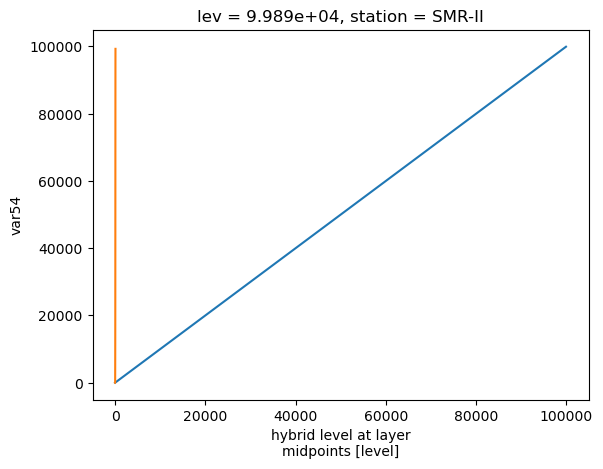

In [54]:
#SMREClevs['lev']=SMREClevs['pressure'].mean('time')
SMREClevs['pressure'].mean('time').plot()
SMREClevs['var54'].isel(lev=0).dropna('time').mean('time').plot()

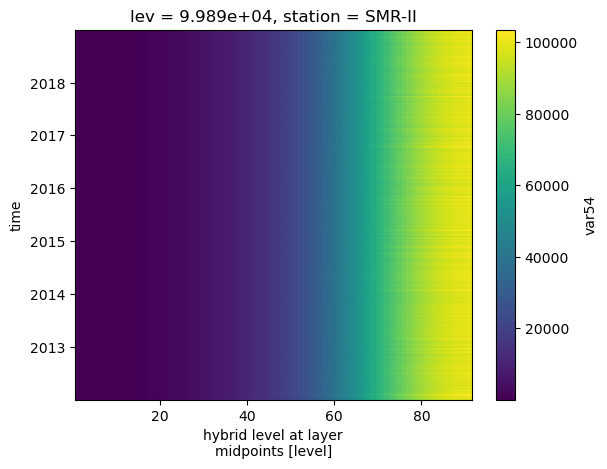

In [55]:
SMREClevs['var54'].isel(lev=0).dropna('time').plot()